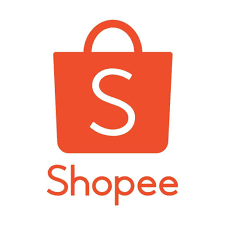</a>

<h1 align="center"><font size="5">Project: Comments analysis - Predict "sentiment" of comments from shopee clothes comments</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-05-27 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: MDS5_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname: Cao Anh Hao
- Date of birth: 05/01/2002
- Place of birth: TPHCM
- Email:caoanhhao20@gmail
- Mobile phone: 0902536407

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Logistic Regression Algorithm** to predict: **"sentiment of comments from shopee clothes comments"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: comment_final.csv

#### Data dictionary:
1. raw_comment: comment of user
2. label: sactify of user

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Logistic Regression
    - Model Evaluation using Test set
    - Report

### Import library

In [5]:
import pandas as pd
import numpy as np
import regex
from underthesea import sent_tokenize
import string
from processor.text import TextProcessor
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

In [24]:
import warnings
warnings.filterwarnings('ignore')

### Read and overview dataset

In [25]:
df = pd.read_csv('./input_data/comment_final.csv')
df.head()

,raw_comment,label
0,form k đẹp lắm,0.0
1,Áo Rộng thật sự\nGl nhanh\nChật lượng vải tốt,1.0
2,Màu túi hơi tối do với ảnh chụp,0.0
3,Chất liệu vải k ổn lắm,0.0
4,"Mã ""màu đen"" hiện lên áo màu đen, còn mã ""đeN""...",0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw_comment  11364 non-null  object 
 1   label        11364 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.7+ KB


### Pre-processing data

#### Convert to lower case

In [27]:
df['comments'] =  df.raw_comment.str.lower()
df.head()

,raw_comment,label,comments
0,form k đẹp lắm,0.0,form k đẹp lắm
1,Áo Rộng thật sự\nGl nhanh\nChật lượng vải tốt,1.0,áo rộng thật sự\ngl nhanh\nchật lượng vải tốt
2,Màu túi hơi tối do với ảnh chụp,0.0,màu túi hơi tối do với ảnh chụp
3,Chất liệu vải k ổn lắm,0.0,chất liệu vải k ổn lắm
4,"Mã ""màu đen"" hiện lên áo màu đen, còn mã ""đeN""...",0.0,"mã ""màu đen"" hiện lên áo màu đen, còn mã ""đen""..."


#### Check duplicate and remove

In [28]:
df.comments.duplicated().sum()

0

###### no data duplicated

In [29]:
df.drop_duplicates(subset=['comments'], inplace=True)

#### Check missing values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11364 entries, 0 to 11363
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw_comment  11364 non-null  object 
 1   label        11364 non-null  float64
 2   comments     11364 non-null  object 
dtypes: float64(1), object(2)
memory usage: 355.1+ KB


###### no missing value

#### Remove `’` 

In [31]:
df.comments = df.comments.str.replace('’', '')

#### Convert multiple dot to 1 dot

In [42]:
df.comments = df.comments.apply(lambda x: regex.sub(r'\.+', '.', x))

#### Process teencode

In [44]:
text_processor = TextProcessor()

In [45]:
df.comments = df.comments.apply(lambda x: text_processor.replace_teencode_to_text(x)


#### Process special word

In [46]:
df.comments = df.comments.apply(lambda x: text_processor.process_special_word(x))


#### Cleaning data

In [48]:
df.comments = df.comments.apply(lambda x: text_processor.process_text(str(x)))

#### Convert to unicode

In [49]:
df.comments = df.comments.apply(lambda x: text_processor.covert_unicode(x))

#### Process post_tagging

In [50]:
df.comments = df.comments.apply(lambda x: text_processor.process_postag_thesea(x))

In [51]:
df.head()

,raw_comment,label,comments
0,form k đẹp lắm,0.0,không_đẹp lắm
1,Áo Rộng thật sự\nGl nhanh\nChật lượng vải tốt,1.0,rộng gl nhanh chật tốt
2,Màu túi hơi tối do với ảnh chụp,0.0,hơi tối chụp
3,Chất liệu vải k ổn lắm,0.0,không_ổn lắm
4,"Mã ""màu đen"" hiện lên áo màu đen, còn mã ""đeN""...",0.0,đen hiện lên đen mã đen hiện lên đặt đen shop ...


### Visualize

In [52]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black')

In [53]:
df_1 = df[df.label == 1]
df_1.head()

,raw_comment,label,comments
1,Áo Rộng thật sự\nGl nhanh\nChật lượng vải tốt,1.0,rộng gl nhanh chật tốt
5,Sản phẩm đẹp giống hình phù hợp giá tiền đóng ...,1.0,đẹp giống đóng_gói đẹp giao nhanh
6,"Sản phẩm giống hình , shop giao hàng nhanh , đ...",1.0,giống giao nhanh đóng chắn
8,"Sp đúng mô tả ,vải ko dày nhưng ko mỏng ,mặc k...",1.0,đúng không_dày mặc khá mát thích_hợp trẻ mặc đ...
9,"Chẳng biết nói gì thêm, tuyệt vời",1.0,chẳng biết nói thêm


In [58]:
label_1 =' '.join(df_1['comments'])
label_1

"rộng gl nhanh chật tốt đẹp giống đóng_gói đẹp giao nhanh giống giao nhanh đóng chắn đúng không_dày mặc khá mát thích_hợp trẻ mặc đẹp luôn chẳng biết nói thêm may may xong cũng không_là săn không_ý kiến nhiều mua cute mua xong là ghiền luôn xỉu cute tiếc chỉ đặt 😅 nhỏ vừa_tầm mát lắm đẹp quá không_lỡ rất đáng xinh gói giao khá nhanh gói xịn nhiều thẻ ngăn rộng cực thích hình_ảnh không_liên chưa mặc chưa đem ra mỏng tốt đúng đúng mua tư_vấn rất nhiệt_tình_shop rất co hơi rộng so sản_phẩm giao sản_phẩm tốt khá ưng trắng bị vệt bẩn thui là nên mua được ưng lắm mua được sale sản_phẩm tốt giao giống oksản_phẩm so đẹp đúng đúng shipper lại không_cho kiểm_tra làm giao sai không_đúng còn lại yhi đều rất okila đẹp tốt giao nhanh phục_vụ tốt rất ưng_ý sẽ ủng_hộ rất đẹp đeo lên rất cute đẹp ưng luôn 😊 có sẽ ủng_hộ shop tiếp xinhh luôn nhaaa giao đúng đủ hàng đẹp ảnhhh sẽ ủng_hộ shop quá tuyệt_vời ổn hơi so đẹp giống giao nhanh cũng ổn nhìn_chung giống tạng người_lớn bận thấy hơi to quá có không_b

In [59]:
wc.generate(label_1)

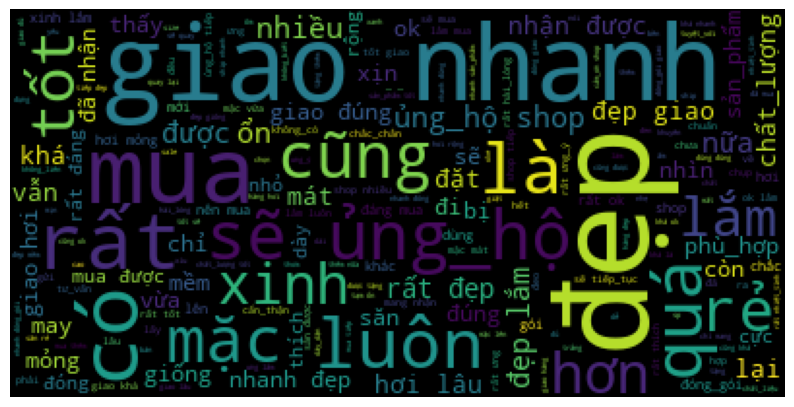

In [65]:
plt.figure(figsize=(10, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [67]:
df_2 = df[df.label == 0]
label_2 =' '.join(df_2['comments'])
wc.generate(label_2)

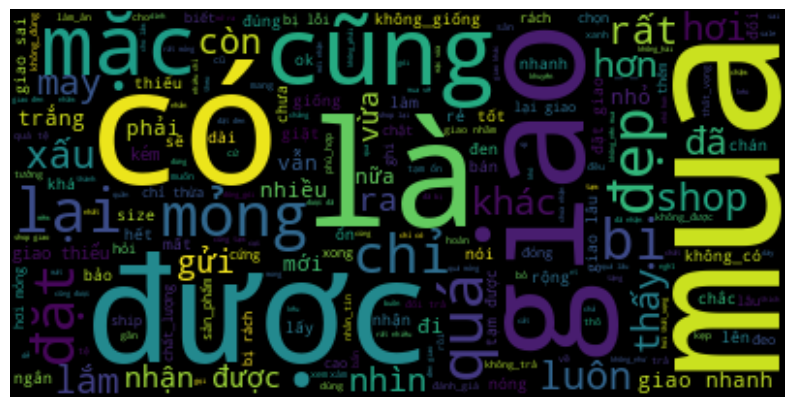

In [68]:
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Build Model

#### Split into input/output

In [69]:
y = df['label']
X = df['comments']

In [70]:
X.head()

0                                        không_đẹp lắm
1                               rộng gl nhanh chật tốt
2                                         hơi tối chụp
3                                         không_ổn lắm
4    đen hiện lên đen mã đen hiện lên đặt đen shop ...
Name: comments, dtype: object

In [71]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

#### Split into train/test 

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

837                                            nhỏ ko mua
1477    khỏi cần phân_vân cứ mua luôn đj đẳng_cấp trụ ...
1745                                          nhạt hơn so
3657                                               ổn đẹp
6720                                        ok hơi to quá
Name: comments, dtype: object

#### Init pipeline for transform and training

In [78]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [79]:
Input = [('Vertorizer',TfidfVectorizer()),('model',LogisticRegression())]

In [80]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Vertorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [81]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vertorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [82]:
train_accuracy = pipe.score(X_train, y_train)
train_accuracy

0.8837263874222692

In [83]:
test_accuracy = pipe.score(X_test, y_test)
test_accuracy

0.8585005279831045

In [84]:
y_pred = pipe.predict(X_test)

### Evaluate result

In [90]:
confusion_matrix(y_test,y_pred)

array([[1255,  158],
       [ 244, 1184]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1413
         1.0       0.88      0.83      0.85      1428

    accuracy                           0.86      2841
   macro avg       0.86      0.86      0.86      2841
weighted avg       0.86      0.86      0.86      2841



### Nhận xét:
* Với tỉ lệ chia tập train 25% (= 2841 user rating, trong đó 1255 giá trị 0-negative và 1586 giá trị 1-postive), model dự đoán:
 Số lượng mẫu thực tế thuộc nhãn 0 và mô hình dự đoán đúng là 1255.
Số lượng mẫu thực tế thuộc nhãn 0 và mô hình dự đoán sai là 158.
Số lượng mẫu thực tế thuộc nhãn 1 và mô hình dự đoán đúng là 1184.
Số lượng mẫu thực tế thuộc nhãn 1 và mô hình dự đoán sai là 244.
Classification Report:

Accuracy (độ chính xác) của mô hình trên tập kiểm tra là 86%.
Precision (độ chính xác dự đoán) của nhãn 0 là 84% và của nhãn 1 là 88%.
Recall (tỷ lệ dự đoán đúng) của nhãn 0 là 89% và của nhãn 1 là 83%.
F1-score (trung bình điều hòa giữa precision và recall) của nhãn 0 là 0.86 và của nhãn 1 là 0.85.
Tổng quan, mô hình có độ chính xác khá cao và có khả năng phân loại tốt những mẫu thuộc cả nhãn 0 và nhãn 1.

In [92]:
accuracy_score(y_test,y_pred)

0.8585005279831045

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
y_pred_prob = pipe.predict_proba(X_test)
y_pred_prob[:5]

array([[0.71119796, 0.28880204],
       [0.98089955, 0.01910045],
       [0.00608666, 0.99391334],
       [0.89777981, 0.10222019],
       [0.0465521 , 0.9534479 ]])

In [95]:
roc_auc_score = y_test,y_pred_prob[:,1]

In [96]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

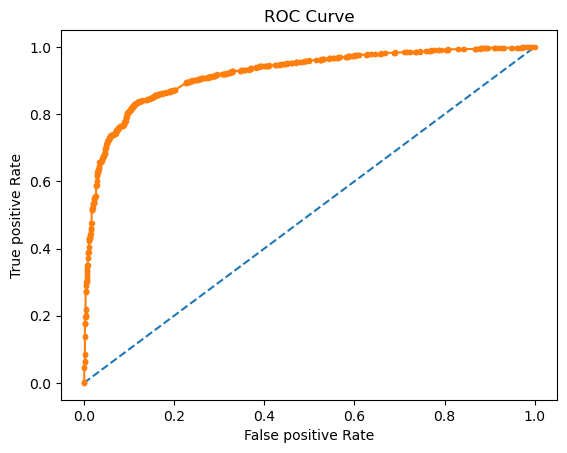

In [97]:
plt.title('ROC Curve')
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

###
Mô hình đạt được hiệu suất đánh giá ở mức "High" với khả năng:

Đạt được tỷ lệ Recall cao, tức là khả năng dự đoán đúng các mẫu thuộc nhãn dương/nhãn 1 là rất cao.
Đồng thời, vẫn giữ được độ chính xác dự đoán (Precision) cao, tức là tỷ lệ dự đoán đúng các mẫu dương/nhãn 1 là rất cao.
Kết quả này cho thấy mô hình có khả năng phân loại tốt cả các mẫu thuộc nhãn 0 và nhãn 1, và đảm bảo rằng số lượng dự đoán đúng và số lượng dự đoán sai đều được kiểm soát ở mức đáng tin cậy.